In [1]:
import os
import json
import cPickle as pickle
import matplotlib.pyplot as plt

import sys
sys.path.append("../../MyPythonModule")
import mymodule
sys.path.append("../../Interactive_Graph_Visualizer/networkx-master")
import networkx as nx

In [2]:
def suffix_generator(target=None,is_largest=False):
    suffix = ""
    if target != None:
        suffix += "_" + target
    if is_largest == True:
        suffix += "_largest"
    return suffix

In [3]:
def list_to_dict(src_list,default=1,lim_node=-1):
    lim_node -= 1#リスト上限の表記と合わせるため
    ret_dict = {}
    for item in src_list:
        if lim_node > 0 and item > lim_node:
            break
        ret_dict[item] = default
    return ret_dict

In [4]:
test_list = [1,2,3,4]
list_to_dict(test_list)

{1: 1, 2: 1, 3: 1, 4: 1}

In [5]:
search_word = u"iPhone"
max_page = 10
root_dir = "../Data/Search_" + search_word + "_" + unicode(max_page) + "_add_childs" 
is_largest = True
target = "myexttext"
G_name = "G" + suffix_generator(target=target,is_largest=is_largest)
use_to_link = "to_ext_links"
src_pages_dir = os.path.join(root_dir,"Pages")
use_to_link = "to_ext_links"#親から子供
use_from_link=None#子供から親
rem_selfloop = True#自分自身へのリンクを削除するか否か

In [6]:
filenames = os.listdir(src_pages_dir)
filenames

[u'39.json',
 u'58.json',
 u'52.json',
 u'10.json',
 u'22.json',
 u'26.json',
 u'24.json',
 u'18.json',
 u'57.json',
 u'53.json',
 u'51.json',
 u'12.json',
 u'63.json',
 u'5.json',
 u'54.json',
 u'7.json',
 u'28.json',
 u'48.json',
 u'31.json',
 u'59.json',
 u'1.json',
 u'29.json',
 u'3.json',
 u'4.json',
 u'64.json',
 u'11.json',
 u'6.json',
 u'20.json',
 u'42.json',
 u'32.json',
 u'21.json',
 u'13.json',
 u'49.json',
 u'55.json',
 u'50.json',
 u'8.json',
 u'19.json',
 u'27.json',
 u'60.json',
 u'17.json',
 u'40.json',
 u'2.json',
 u'56.json',
 u'9.json',
 u'15.json',
 u'30.json',
 u'14.json',
 u'47.json',
 u'34.json',
 u'61.json',
 u'41.json',
 u'0.json',
 u'38.json',
 u'33.json',
 u'35.json',
 u'45.json',
 u'46.json',
 u'16.json',
 u'25.json',
 u'36.json',
 u'43.json',
 u'37.json',
 u'44.json',
 u'23.json',
 u'62.json']

In [7]:
mymodule.sort_nicely(filenames)
filenames

[u'0.json',
 u'1.json',
 u'2.json',
 u'3.json',
 u'4.json',
 u'5.json',
 u'6.json',
 u'7.json',
 u'8.json',
 u'9.json',
 u'10.json',
 u'11.json',
 u'12.json',
 u'13.json',
 u'14.json',
 u'15.json',
 u'16.json',
 u'17.json',
 u'18.json',
 u'19.json',
 u'20.json',
 u'21.json',
 u'22.json',
 u'23.json',
 u'24.json',
 u'25.json',
 u'26.json',
 u'27.json',
 u'28.json',
 u'29.json',
 u'30.json',
 u'31.json',
 u'32.json',
 u'33.json',
 u'34.json',
 u'35.json',
 u'36.json',
 u'37.json',
 u'38.json',
 u'39.json',
 u'40.json',
 u'41.json',
 u'42.json',
 u'43.json',
 u'44.json',
 u'45.json',
 u'46.json',
 u'47.json',
 u'48.json',
 u'49.json',
 u'50.json',
 u'51.json',
 u'52.json',
 u'53.json',
 u'54.json',
 u'55.json',
 u'56.json',
 u'57.json',
 u'58.json',
 u'59.json',
 u'60.json',
 u'61.json',
 u'62.json',
 u'63.json',
 u'64.json']

In [8]:
dst_dict = {}
for num,filename in enumerate(filenames):
    """idが飛んでいた時のために念のためチェック"""
    check_num = int(os.path.splitext(filename)[0])
    if num != check_num:
        num = check_num
        print "check_num is not correspond"

    """jsonを読み込みリンクを取得"""
    with open(os.path.join(src_pages_dir,filename)) as fj:
        src_json_dict=json.load(fj)

    if use_to_link != None:
    #for to_link_name in use_to_link:
        to_links = src_json_dict.get(use_to_link,[])
        if rem_selfloop == True and num in to_links:
            to_links.remove(num)

        """出力用グラフ辞書にエッジ情報(自分から子)を登録"""
        if num in dst_dict:
            dst_dict[num].update(list_to_dict(to_links,1))
        else:
            dst_dict[num] = list_to_dict(to_links,1)

    if use_from_link != None:
        from_links = src_json_dict.get(use_from_link,[])
        if rem_selfloop == True and num in to_links:
            from_links.remove(num)

        """エッジ情報(親から自分へ)を登録"""
        for from_link in from_links:
            if  from_link in  dst_dict:
                dst_dict[use_from_link].update(list_to_dict([num],1))
            else:
                dst_dict[use_from_link] = list_to_dict([num],1)

In [9]:
dst_dict

{0: {11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1},
 1: {},
 2: {28: 1, 29: 1, 30: 1, 31: 1},
 3: {9: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1},
 4: {31: 1, 51: 1, 52: 1},
 5: {28: 1, 29: 1, 30: 1, 31: 1, 53: 1},
 6: {31: 1, 52: 1},
 7: {31: 1, 56: 1},
 8: {57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1},
 9: {28: 1, 29: 1, 30: 1, 31: 1, 53: 1},
 10: {31: 1, 56: 1},
 11: {},
 12: {26: 1},
 13: {},
 14: {26: 1},
 15: {0: 1},
 16: {},
 17: {0: 1, 26: 1},
 18: {0: 1, 26: 1},
 19: {0: 1, 5: 1, 26: 1},
 20: {},
 21: {26: 1},
 22: {},
 23: {},
 24: {},
 25: {},
 26: {0: 1, 21: 1},
 27: {11: 1, 16: 1, 20: 1},
 28: {9: 1,
  29: 1,
  30: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  39: 1,
  42: 1,
  44: 1,
  46: 1,
  47: 1,
  50: 1},
 29: {9: 1,
  30: 1,
  32: 1,

In [10]:
G = nx.DiGraph(dst_dict)
old_node_num = len(G.node)
old_node_num

65

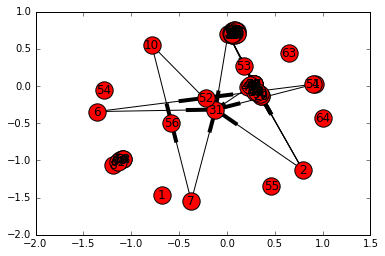

In [11]:
nx.draw_networkx(G)
plt.show()

In [12]:
sel_largest = is_largest
if sel_largest == True:
    G_ = G.to_undirected()
    largest = max(nx.connected_component_subgraphs(G_),key=len)
    rem_nodes = set(G_.node.keys()) - set(largest.node.keys())
    G.remove_nodes_from(rem_nodes)

new_node_num = len(G.node)
new_node_num

53

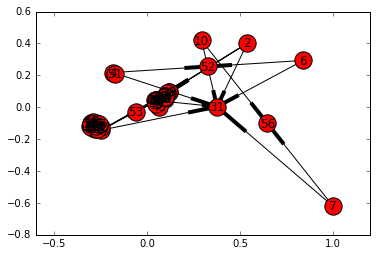

In [13]:
nx.draw_networkx(G)
plt.show()

In [14]:
dst_pkl_name = G_name + ".gpkl"

"""最大のノードグループのみを使う場合"""
if sel_largest == True:
    with open(os.path.join(root_dir,"file_id_list.list"),"w") as fo:
        pickle.dump(list(G.node.keys()),fo)
"""一旦グラフ形式にまとめてから保存(ファイル間で渡す際にファイル数が1つになってくれたほうが有難い．DiGraphにしたければ読み込み後に変換しよう)"""
with open(os.path.join(root_dir,dst_pkl_name),"w") as fo:
    pickle.dump(G,fo)
with open(os.path.join(root_dir,G_name + ".txt"),"w") as fo:
    print >> fo,"全Webページから最大のノード群を採用"
    print >> fo,"old_node_number:" + str(old_node_num)
    print >> fo,"new_node_number:" + str(new_node_num) + "（G_myexttext_largest.gpkl）"